In [1]:
import pandas as pd
import json
import os

# Directory with annotated files
annotated_dir = "../data/accuracy_dataset/annotated"

# Collect all data entries
all_entries = []

# Go through each annotator file
for filename in os.listdir(annotated_dir):
    if not filename.endswith("_annotator.jsonl"):
        continue

    annotator_id = filename.split("_")[0]  # '1' from '1_annotator.jsonl'
    filepath = os.path.join(annotated_dir, filename)

    with open(filepath, "r", encoding="utf-8") as f:
        for line in f:
            entry = json.loads(line)
            entry["annotator"] = int(annotator_id)
            all_entries.append(entry)

# Load into DataFrame
df = pd.DataFrame(all_entries)

len(df)

150

In [2]:
to_annotate_dir = "../data/accuracy_dataset/to_annotate"
source_entries = []

for filename in os.listdir(to_annotate_dir):
    if not filename.endswith("_annotator.jsonl"):
        continue

    with open(os.path.join(to_annotate_dir, filename), "r", encoding="utf-8") as f:
        annotator_id = filename.split("_")[0]  # '1' from '1_annotator.jsonl'
        for line in f:
            entry = json.loads(line)
            source_entries.append({
                "q_id": entry["q_id"],
                "psg_id": entry["psg_id"],
                "source": entry["source"],
                "annotator": int(annotator_id)
            })

# Create DataFrame from sources
df_source = pd.DataFrame(source_entries)
print(len(df_source))
# Merge with annotated DataFrame on q_id and psg_id
df = df.merge(df_source, on=["q_id", "psg_id", "annotator"], how="inner")

# Verify
len(df)

150


150

In [3]:
df['source'].unique()

array(['LLM', '35_tokens', 'dev_thresholded', 'start', 'full'],
      dtype=object)

/tmp/ipykernel_2551543/2999885790.py:11: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.histplot(data=df, x="time_sec", hue="source", multiple="stack", bins=20, palette=palette)


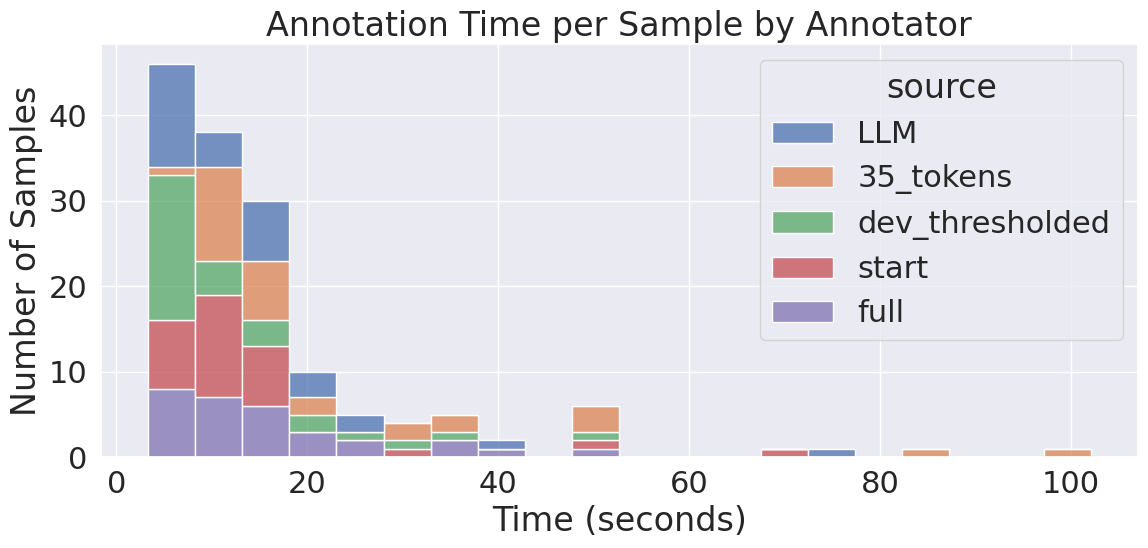

/tmp/ipykernel_2551543/2999885790.py:21: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.boxplot(data=df, x="annotator", y="time_sec", hue="annotator", palette=palette)


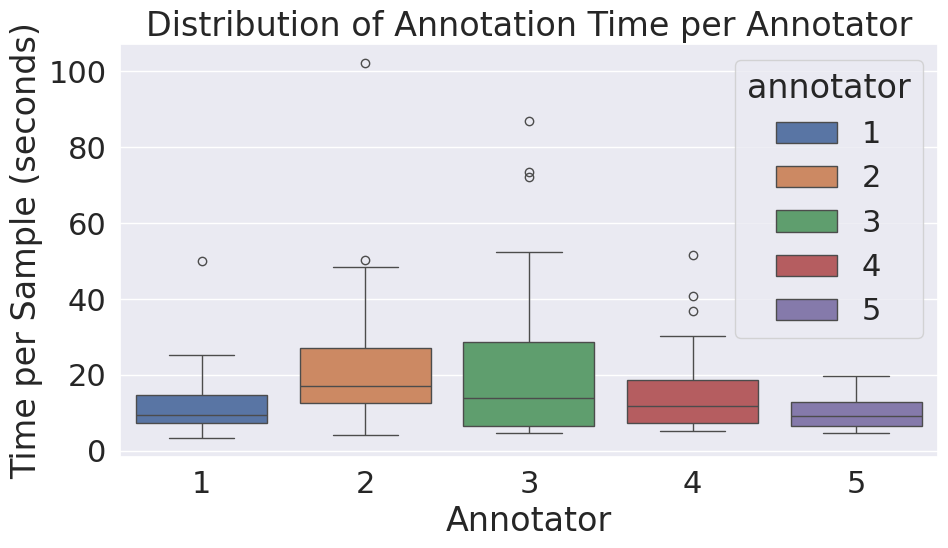

Each bin spans approximately 4.94 seconds


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_theme()
sns.set(context='notebook', font_scale=2) 

palette = sns.color_palette("deep")  # or any palette you prefer

# Load and prepare the data (assuming df is already created and includes 'annotator' and 'time_sec')
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="time_sec", hue="source", multiple="stack", bins=20, palette=palette)
plt.title("Annotation Time per Sample by Annotator")
plt.xlabel("Time (seconds)")
plt.ylabel("Number of Samples")
plt.grid(True)
plt.tight_layout()
plt.savefig("fig/annotator_time_spent_hist.pdf", dpi=900)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="annotator", y="time_sec", hue="annotator", palette=palette)
plt.title("Distribution of Annotation Time per Annotator")
plt.xlabel("Annotator")
plt.ylabel("Time per Sample (seconds)")
plt.grid(True, axis='y')
plt.tight_layout()
plt.savefig("fig/annotator_time_spent_box.pdf", dpi=900)
plt.show()
len(df)

min_val = df["time_sec"].min()
max_val = df["time_sec"].max()
n_bins = 20

bin_width = (max_val - min_val) / n_bins
print(f"Each bin spans approximately {bin_width:.2f} seconds")

In [5]:


# Summary stats per annotator
summary = df.groupby("annotator")["time_sec"].agg(["count", "mean", "sum"]).round(2)
summary.columns = ["# Samples", "Avg Time (s)", "Total Time (s)"]
display(summary)

,# Samples,Avg Time (s),Total Time (s)
annotator,,,
1,30,11.96,358.74
2,30,22.89,686.76
3,30,22.41,672.17
4,30,15.74,472.05
5,30,10.10,302.97


/tmp/ipykernel_2551543/2651499853.py:5: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.histplot(data=df, x="time_sec", hue="source", multiple="stack", bins=20, ax=ax, palette=palette)
/tmp/ipykernel_2551543/2651499853.py:12: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.boxplot(data=df, x="source", y="time_sec", hue="source", ax=ax, legend=None, palette=palette)
/tmp/ipykernel_2551543/2651499853.py:5: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.histplot(data=df, x="time_sec", hue="source", multiple="stack", bins=20, ax=ax, palette=palette)
/tmp/ipykernel_2551543/2651499853.py:12: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.boxplot(data=df, x="source", y="time_sec", hue="source", ax=ax, legend=None, palette=palette)


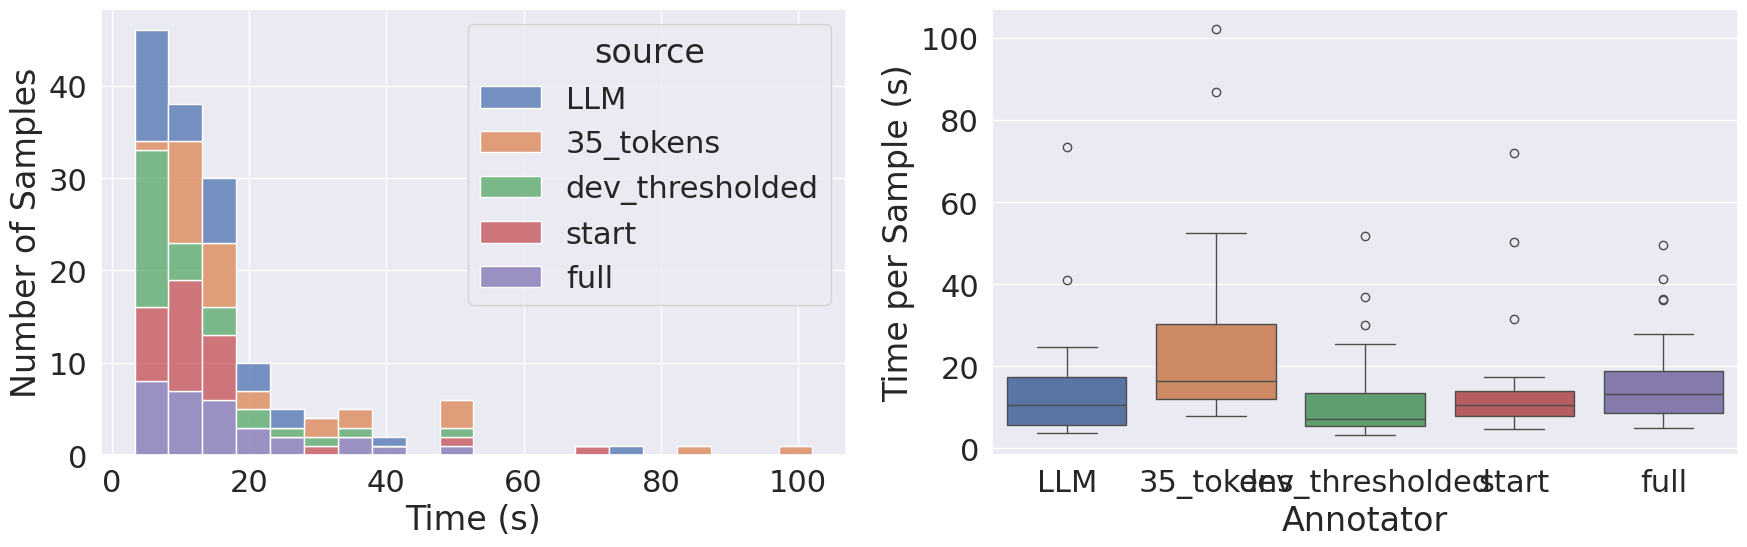

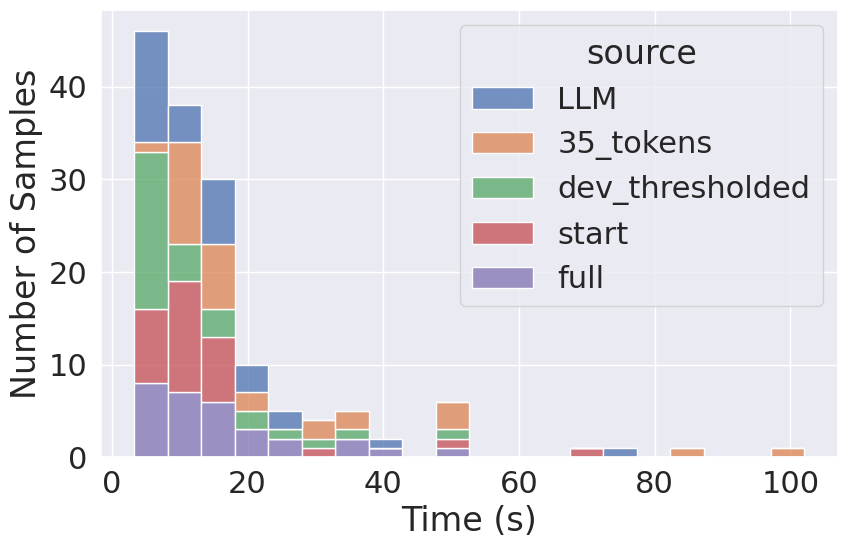

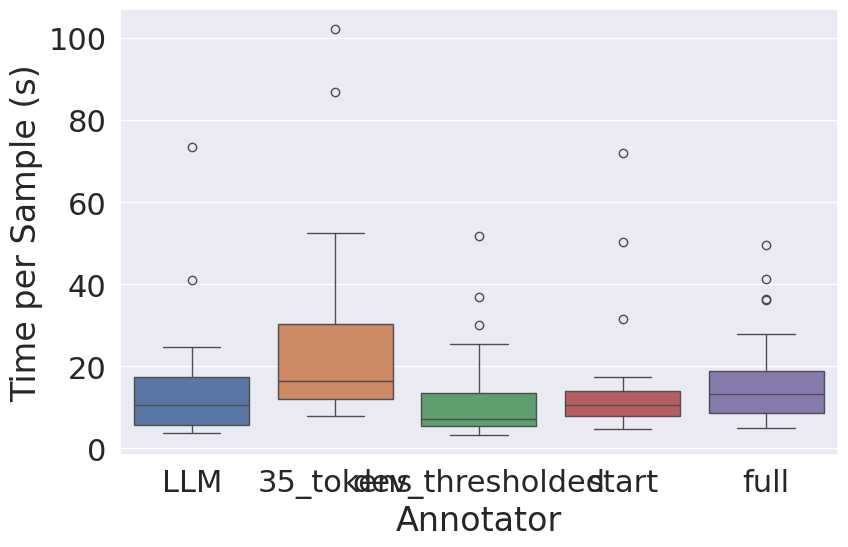

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histogram(ax):
    sns.histplot(data=df, x="time_sec", hue="source", multiple="stack", bins=20, ax=ax, palette=palette)
    ax.set_title("")
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Number of Samples")
    ax.grid(True)

def plot_boxplot(ax):
    sns.boxplot(data=df, x="source", y="time_sec", hue="source", ax=ax, legend=None, palette=palette)
    ax.set_title("")
    ax.set_xlabel("Annotator")
    ax.set_ylabel("Time per Sample (s)")
    ax.grid(True, axis='y')

# Combined plot
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
plot_histogram(axes[0])
plot_boxplot(axes[1])
plt.tight_layout()
fig.savefig("fig/annotator_time_spent_combined.pdf", dpi=900)

# Separate histogram
fig_hist, ax_hist = plt.subplots(figsize=(9, 6))
plot_histogram(ax_hist)
fig_hist.tight_layout()
fig_hist.savefig("fig/annotator_time_spent_hist.pdf", dpi=900)

# Separate boxplot
fig_box, ax_box = plt.subplots(figsize=(9, 6))
plot_boxplot(ax_box)
fig_box.tight_layout()
fig_box.savefig("fig/annotator_time_spent_box.pdf", dpi=900)

plt.show()


In [7]:
def remove_iqr_outliers_per_annotator(df):
    cleaned_df = pd.DataFrame()
    for annotator_id, group in df.groupby("annotator"):
        Q1 = group["time_sec"].quantile(0.25)
        Q3 = group["time_sec"].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        filtered_group = group[(group["time_sec"] >= lower_bound) & (group["time_sec"] <= upper_bound)]
        cleaned_df = pd.concat([cleaned_df, filtered_group], ignore_index=True)
    return cleaned_df

cleaned_df = remove_iqr_outliers_per_annotator(df)
cleaned_df.head()

,q_id,psg_id,q_text,extraction,decision,time_sec,annotator,source
0,990852,7283549,who is dr ari brown,Dr. Brown is a pediatrician She offers compreh...,y,14.63,1,LLM
1,915544,7807432,what types of earthquake waves usually cause t...,most destruction most,n,3.52,1,dev_thresholded
2,83458,7852599,cast of movie cowboys,The Cowboys is a 1972 Western motion picture s...,y,5.42,1,start
3,961950,7722663,when was the northridge california earthquake,"On the morning of Jan. 17, 1994",y,3.72,1,LLM
4,988653,7288044,who is the president of the republic of texas ...,,n,3.29,1,dev_thresholded


In [8]:
len(cleaned_df)

141

In [9]:
from transformers import AutoTokenizer

def get_extraction_lengths(
        dataset_dir="../data/accuracy_dataset",
        tokenizer_name="bert-base-uncased",
):
    tokenizer = AutoTokenizer.from_pretrained(tokenizer_name)
    mean_lengths = {}

    excluded = ["accuracy_dataset.jsonl", "accuracy_dataset_all_sources_positive.jsonl"]

    for filename in os.listdir(dataset_dir):
        if filename in excluded or not filename.endswith(".jsonl"):
            continue

        label = filename.replace("accuracy_dataset_", "").replace(".jsonl", "")
        token_counts = []

        with open(os.path.join(dataset_dir, filename), "r") as f:
            for line in f:
                example = json.loads(line)
                if "extraction" not in example:
                    raise ValueError(f"Missing 'extraction' in {filename} for q_id {example['q_id']}")

                tokens = tokenizer.tokenize(example["extraction"])
                if example["positive"]:
                    token_counts.append(len(tokens))

        if token_counts:
            mean_lengths[label] = sum(token_counts) / len(token_counts)

    return mean_lengths

extraction_lengths = get_extraction_lengths()
print(extraction_lengths)

def rename_key(key):
    rename_dict = {
        'llm': 'LLM',
        'full_start': 'start'
    }
    return rename_dict.get(key, key)
    

extraction_lengths_list = [{
    'source': rename_key(key),
    'token_len': value 
} for key, value in extraction_lengths.items()]

df_lenghts = pd.DataFrame(extraction_lengths_list)
df_lenghts

print(df_lenghts['source'].unique())
print(cleaned_df['source'].unique())

cleaned_df = cleaned_df.merge(df_lenghts, on=["source"], how="inner")
len(cleaned_df)

{'full': 66.16666666666667, 'dev_thresholded': 16.6, '35_tokens': 36.13333333333333, 'llm': 24.066666666666666, 'full_start': 16.266666666666666}
['full' 'dev_thresholded' '35_tokens' 'LLM' 'start']
['LLM' 'dev_thresholded' 'start' 'full' '35_tokens']


141

In [10]:
def rename_df_to_plot(rename_df):
    source_rename = {
        "LLM": "Gemma 2",
        "35_tokens": "FGR-C #35",
        "dev_thresholded": "FGR-C",
        "full": "full",
        "start": "start"
    }
    
    # Apply renaming and return the renamed DataFrame
    renamed_df = rename_df.copy()  # Create a copy of the DataFrame
    renamed_df["source"] = renamed_df["source"].replace(source_rename)    
    
    return renamed_df


/tmp/ipykernel_2551543/2180155343.py:25: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(
/tmp/ipykernel_2551543/2180155343.py:25: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(


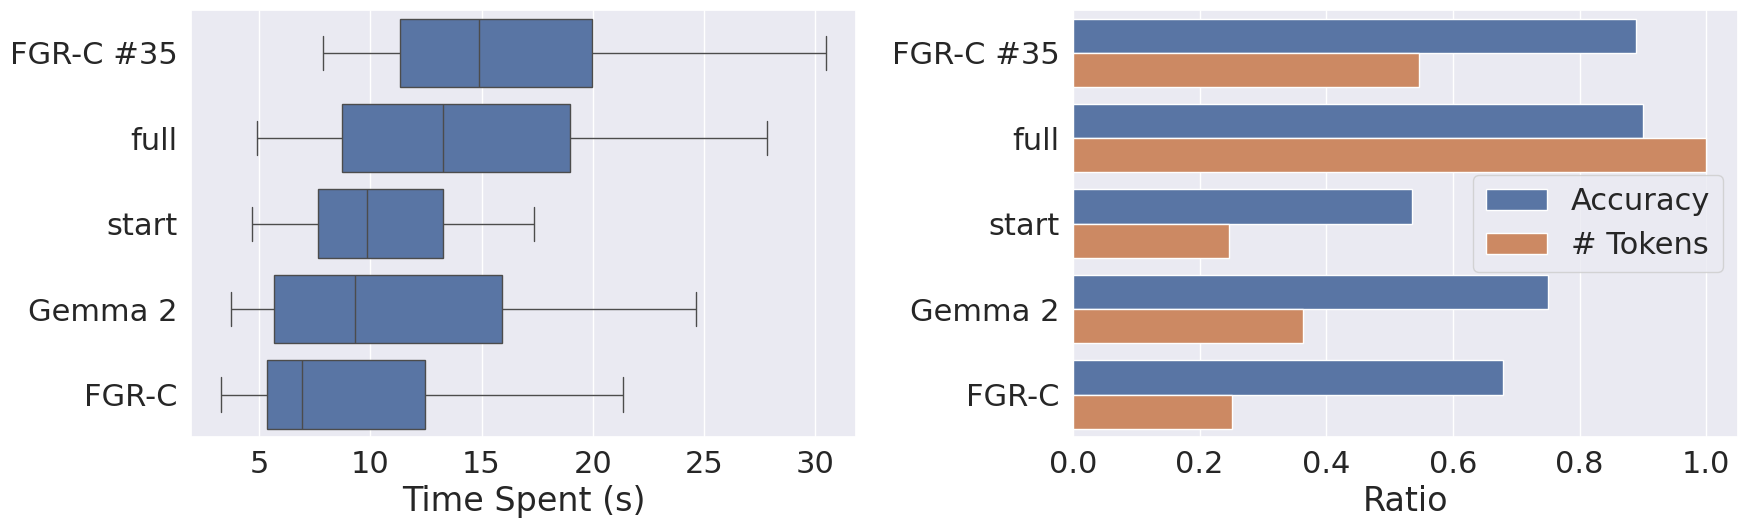

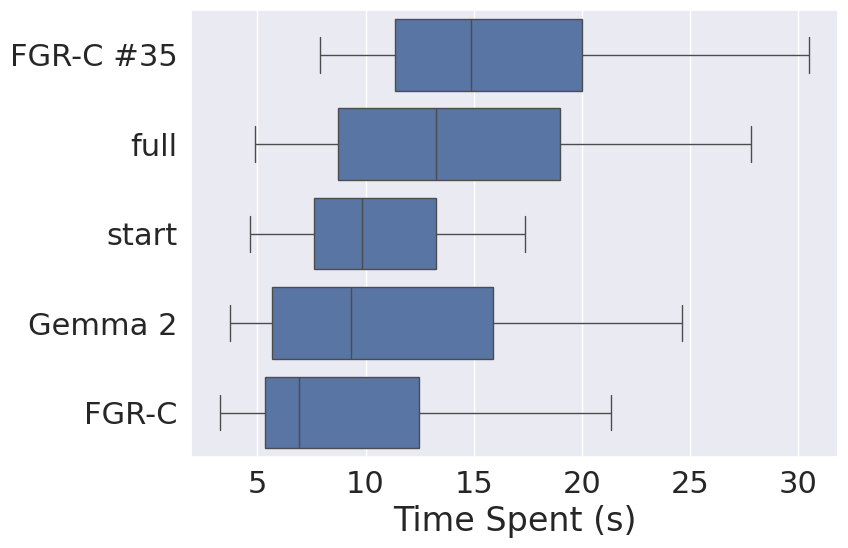

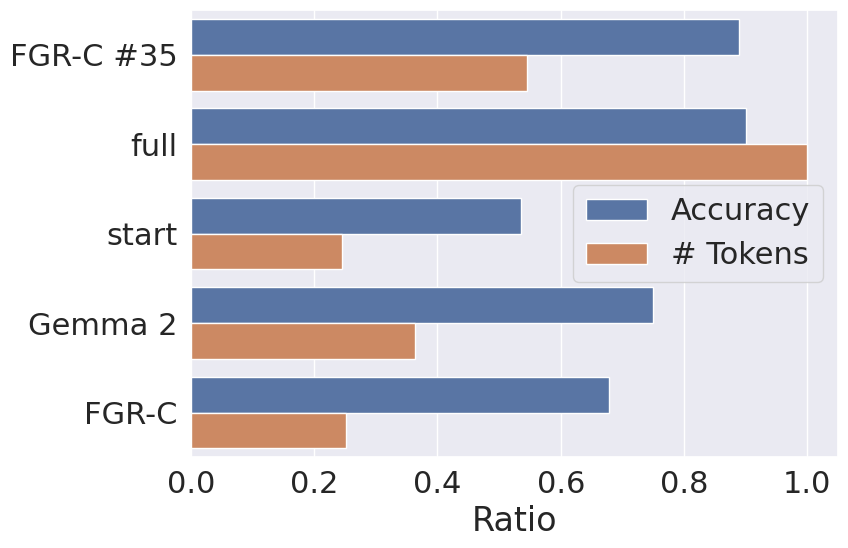

In [11]:
# --- PLOTTING FUNCTIONS ---

def plot_time_boxplot(ax, df, order):
    sns.boxplot(
        data=df,
        y="source",
        x="time_sec",
        ax=ax,
        showfliers=False,
        order=order, 
    )
    ax.set_xlabel("Time Spent (s)")
    ax.set_ylabel("")
    ax.set_title("")

def plot_metrics_barplot(ax, df, order):
    df_melted = pd.melt(df, id_vars=["source"], value_vars=["decision_value", "token_len_n"],
                        var_name="metric", value_name="value")
    metric_rename = {
        "decision_value": "Accuracy",
        'token_len_n': "# Tokens"
    }
    df_melted["metric"] = df_melted["metric"].replace(metric_rename)

    sns.barplot(
        data=df_melted,
        y="source",
        x="value",
        hue="metric",
        ax=ax,
        estimator="mean",
        order=order,
        errorbar=None, 
        palette=palette
    )
    ax.set_xlabel("Ratio")
    ax.set_ylabel("")
    ax.set_title("")
    ax.legend_.set_title(None)


# --- DATA PREP ---

cleaned_df['decision_value'] = cleaned_df['decision'].apply(lambda x: 1 if x == 'y' else 0)
cleaned_df['token_len_n'] = cleaned_df['token_len'] / cleaned_df['token_len'].max()
cleaned_df_renamed = rename_df_to_plot(cleaned_df)

order = ["FGR-C", "Gemma 2", "start",  "full", "FGR-C #35"]
order.reverse()

# --- COMBINED FIGURE ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5.8))
plot_time_boxplot(ax1, cleaned_df_renamed, order)
plot_metrics_barplot(ax2, cleaned_df_renamed, order)
plt.tight_layout()
fig.savefig("fig/accuracy_dataset_results.pdf", dpi=900)

# --- SEPARATE FIGURES ---

# Time boxplot only
fig_box, ax_box = plt.subplots(figsize=(9, 6))
plot_time_boxplot(ax_box, cleaned_df_renamed, order)
fig_box.tight_layout()
fig_box.savefig("fig/accuracy_dataset_results_boxplot.pdf", dpi=900)

# Metrics barplot only
fig_bar, ax_bar = plt.subplots(figsize=(9, 6))
plot_metrics_barplot(ax_bar, cleaned_df_renamed, order)
fig_bar.tight_layout()
fig_bar.savefig("fig/accuracy_dataset_results_barplot.pdf", dpi=900)

plt.show()

In [15]:
cleaned_df_renamed.groupby('source')['decision_value'].count()

source
FGR-C        28
FGR-C #35    27
Gemma 2      28
full         30
start        28
Name: decision_value, dtype: int64

In [13]:
cleaned_df_renamed.groupby('source')['time_sec'].mean()

source
FGR-C         9.945357
FGR-C #35    19.117037
Gemma 2      11.572500
full         16.798333
start        10.921429
Name: time_sec, dtype: float64

In [14]:
cleaned_df_renamed.groupby('source')['decision_value'].value_counts()

source     decision_value
FGR-C      1                 19
           0                  9
FGR-C #35  1                 24
           0                  3
Gemma 2    1                 21
           0                  7
full       1                 27
           0                  3
start      1                 15
           0                 13
Name: count, dtype: int64